<a href="https://colab.research.google.com/github/NDsasuke/Gradient-decent--simplex-method--Binary-linear-programming/blob/main/Binary%20Linear%20Programming/Network_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the required module:

The from pulp import * statement imports the necessary functions and classes from the PuLP library, which is used for solving linear programming problems.

In [17]:
from pulp import *


#Setting up the problem:

The prob = LpProblem("Network_Design", LpMinimize) line creates a new linear programming problem with the name "Network_Design" and the objective of minimizing the total cost.

In [18]:

# Set the nodes, facilities, demands, and costs
nodes = ["Node1", "Node2", "Node3", "Node4", "Node5"]
facilities = ["Facility1", "Facility2", "Facility3"]
demands = {"Node1": 10, "Node2": 15, "Node3": 8, "Node4": 12, "Node5": 6}
costs = {
    ("Node1", "Facility1"): 5,
    ("Node1", "Facility2"): 8,
    ("Node1", "Facility3"): 10,
    ("Node2", "Facility1"): 7,
    ("Node2", "Facility2"): 9,
    ("Node2", "Facility3"): 6,
    ("Node3", "Facility1"): 6,
    ("Node3", "Facility2"): 12,
    ("Node3", "Facility3"): 8,
    ("Node4", "Facility1"): 9,
    ("Node4", "Facility2"): 6,
    ("Node4", "Facility3"): 11,
    ("Node5", "Facility1"): 8,
    ("Node5", "Facility2"): 10,
    ("Node5", "Facility3"): 7,
}

In [19]:
# Create the binary linear programming problem
prob = LpProblem("Network_Design", LpMinimize)


#Defining the decision variables:

The x = LpVariable.dicts("Use", facilities, cat="Binary") line defines the binary decision variables x using the LpVariable.dicts() function. These variables represent whether a facility is open or not.
The y = LpVariable.dicts("Assign", [(n, f) for n in nodes for f in facilities], cat="Binary") line defines the binary decision variables y using the LpVariable.dicts() function. These variables represent whether a node n is assigned to a facility f or not.

In [20]:
# Define the decision variables
x = LpVariable.dicts("Use", facilities, cat="Binary")
y = LpVariable.dicts("Assign", [(n, f) for n in nodes for f in facilities], cat="Binary")


#Defining the objective function:

The prob += lpSum([costs[(n, f)] * y[(n, f)] for n in nodes for f in facilities]), "Total_Cost" line defines the objective function of the problem, which aims to minimize the total cost. It sums up the costs of serving each node from each facility based on the assignment decision variables y.

In [21]:
# Define the objective function
prob += lpSum([costs[(n, f)] * y[(n, f)] for n in nodes for f in facilities]), "Total_Cost"

#Defining the constraints
* These constraints ensure that each node is assigned to exactly one facility, satisfying the demand at each node.
* These constraints ensure that the assignment of nodes to facilities is valid based on the facility being open

In [22]:
# Define the constraints
for n in nodes:
    prob += lpSum([y[(n, f)] for f in facilities]) == 1, f"Demand_Satisfaction_Constraint_{n}"
for f in facilities:
    for n in nodes:
        prob += y[(n, f)] <= x[f], f"Coverage_Constraint_{f}_{n}"

#Solving the problem:

The prob.solve() line solves the linear programming problem and finds the optimal solution that minimizes the total cost while satisfying the constraints

In [23]:
# Solve the problem
prob.solve()

1

#Printing the optimal solution:
It identifies the facilities that are open and prints the nodes that are assigned to each open facility.

In [24]:
# Print the optimal solution
print("Optimal network design:")
for f in facilities:
    if value(x[f]) == 1:
        print(f"{f} is open and serves the following nodes:")
        for n in nodes:
            if value(y[(n, f)]) == 1:
                print(n)

Optimal network design:
Facility1 is open and serves the following nodes:
Node1
Node3
Facility2 is open and serves the following nodes:
Node4
Facility3 is open and serves the following nodes:
Node2
Node5


#visualize

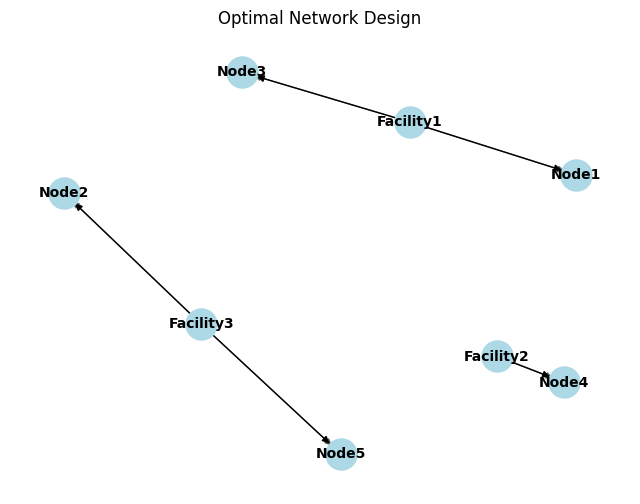

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
for f in facilities:
    for n in nodes:
        if value(y[(n, f)]) == 1:
            G.add_edge(f, n)

# Set the positions of nodes for better visualization
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, arrowsize=10)

# Set plot title and display the graph
plt.title("Optimal Network Design")
plt.axis('off')
plt.show()
